### 3.1 Контролируем дерево ###

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 

from IPython.display import HTML
style = "<style>{width:50% !important; height:10% !important;}</style>"
HTML(style)

In [27]:
from sklearn.model_selection import GridSearchCV

In [4]:
titanic_data = pd.read_csv('C:/work/Datasets/Titanic/train.csv')

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
# кодировка номинативных переменных

X = pd.get_dummies(X)

In [7]:
# замена пропущенных значений в столбце Age медианным значением

X = X.fillna({'Age': X.Age.median()})

In [8]:
y = titanic_data.Survived

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
# min_samples_split

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

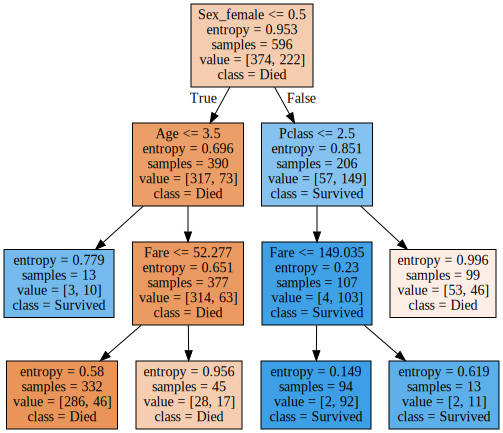

In [22]:
# дерево графически

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X), 
                                    class_names=['Died', 'Survived'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))

### RandomForest ###

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf_rf = RandomForestClassifier()

In [25]:
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [28]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [29]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [30]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [31]:
best_clf = grid_search_cv_clf.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.823728813559322

In [36]:
# важность признаков

feature_importances = best_clf.feature_importances_

In [37]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                    'feature_importances': feature_importances})

In [45]:
feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True)

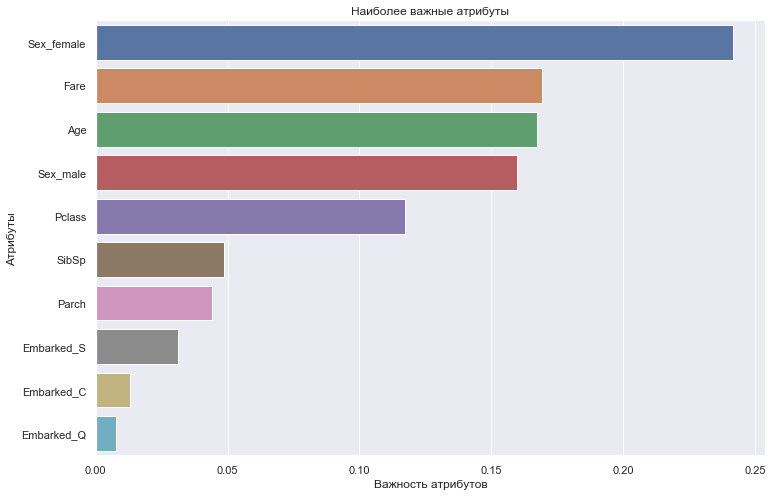

In [47]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()